<a href="https://colab.research.google.com/github/ECHOIgOng/229351_660510593/blob/main/229351_LAB03_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 3 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

1. ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ จากนั้นบันทึกเป็นไฟล์ *.pdf

### ในปฏิบัติการนี้เราจะฝึกการทำ PCA ด้วยสองวิธี คือ
1. หาด้วยการแยกส่วนประกอบของเมทริกซ์ผ่าน numpy
2. หาด้วยการใช้เครื่องมือที่มีมาให้ใน scikit-learn

ดาวน์โหลดข้อมูลสัตว์ต่างๆ 50 ชนิดดังนี้  
ชนิดสัตว์: https://donlapark.pages.dev/229351/data/classes.txt  
ตัวแปรต่างๆ: https://donlapark.pages.dev/229351/data/predicates.txt  
ค่าของสัตว์แต่ละชนิด: https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

In [ ]:
!pip install -q wget

import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA



  Preparing metadata (setup.py) ... done


In [ ]:
# Download the files
!wget -O classes.txt https://donlapark.pages.dev/229351/data/classes.txt
!wget -O predicate-matrix-continuous.txt https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

--2025-07-16 19:03:12--  https://donlapark.pages.dev/229351/data/classes.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 755 [text/plain]
Saving to: ‘classes.txt’

classes.txt         100%[===================>]     755  --.-KB/s    in 0s      

2025-07-16 19:03:12 (10.5 MB/s) - ‘classes.txt’ saved [755/755]

--2025-07-16 19:03:13--  https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29800 (29K) [text/plain]
Saving to: ‘predicate-matrix-continuous.txt’

predicate-matrix-co 100%[===================>]  29

In [ ]:
classes = np.genfromtxt('classes.txt',dtype='str')

classes[:5]

array([['1', 'antelope'],
       ['2', 'grizzly+bear'],
       ['3', 'killer+whale'],
       ['4', 'beaver'],
       ['5', 'dalmatian']], dtype='<U15')

In [ ]:
data = np.genfromtxt('predicate-matrix-continuous.txt')

data[:5,:5]

array([[-1.  , -1.  , -1.  , ...,  2.35,  9.7 ,  8.38],
       [39.25,  1.39,  0.  , ..., 58.64, 20.14, 11.39],
       [83.4 , 64.79,  0.  , ..., 15.77, 13.41, 15.42],
       ...,
       [63.57, 43.1 ,  0.  , ..., 35.95, 28.26,  5.  ],
       [55.31, 55.46,  0.  , ...,  5.04, 18.89, 72.99],
       [10.22, 21.53, 27.73, ...,  3.96, 14.05, 37.98]])

#### Exercise 1

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ฟังก์ชัน $\texttt{np.linalg.eigh}$  
ดังนั้น เมทริกซ์ที่ได้ต้องมีขนาด 50x2

$$ \Sigma =
  \begin{pmatrix}
\text{var}(X_1) & \text{cov}(X_1,X_2) & \cdots & \text{cov}(X_1,X_{85}) \\
\text{cov}(X_2,X_1) & \text{var}(X_2) & \cdots & \text{cov}(X_2,X_{85}) \\
\vdots & \vdots & \ddots & \vdots \\
\text{cov}(X_{85},X_1) & \text{cov}(X_{85},X_1) & \cdots & \text{var}(X_{85}) \\
\end{pmatrix}
 $$

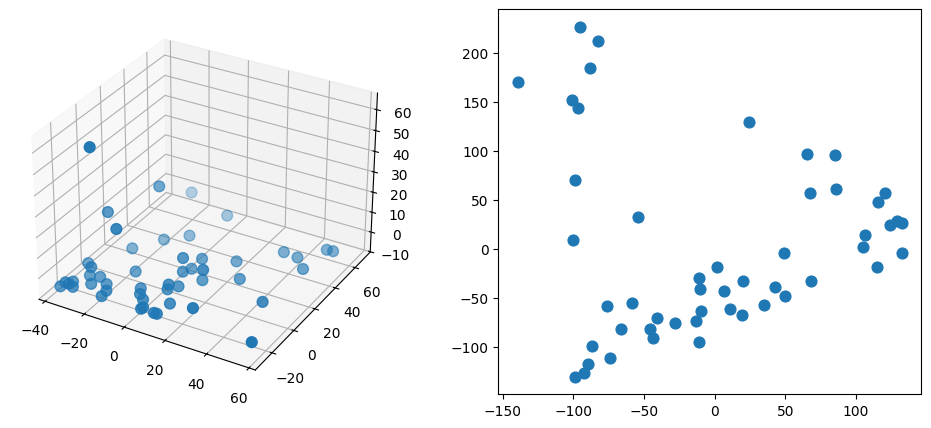

In [ ]:
# TODO: enter code here

# 1. Center ข้อมูล สมมติว่า data_c คือ normalized (centered) data

M = data

np.mean(M, axis=0)

M = M - np.mean(M, axis=0)

# 2. หา covariance matrix

A = np.cov(M, rowvar=False)

# 3. Decompose the covariance matrix UDU^T

specA = np.linalg.eigh(A)
D = specA[0]
U = specA[1]
diagD = np.diag(D)

# 4. ดึง column ของ U ที่ประกอบไปด้วย eigenvector สองตัวที่มีค่า eigenvalue สูงที่สุด

data_c = U @ diagD @ U.T

# 5. เอา data_c ไปทำ projection ทิศทางของ eigenvector ใน U

U_23 = U[:,-2:]

M2 = M @ U_23

# Result: a (50,2) matrix

fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(M[:,0], M[:,1], M[:,2], s=60);

ax2 = fig.add_subplot(122)
ax2.scatter(M2[:,0], M2[:,1], s=60);

#### OPTIONAL

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ $scikit-learn$  
พร้อมกับตรวจสอบว่าเมทริกซ์ที่ได้จากทั้งสองวิธีนี้มีค่าเท่ากัน (ต่างกันแค่ค่าบวกลบ)

In [ ]:
pca = PCA(n_components=2)
B2 = pca.fit_transform(M)
print(B2)

[[  14.33200256  106.35992505]
 [ -58.9630861   -76.22681969]
 [ 170.08767172 -139.3662367 ]
 [  31.85582565  -54.04638157]
 [ -29.65753503  -11.3917049 ]
 [ -40.87859041  -10.72272289]
 [   1.17791115  104.79228138]
 [ -82.43016284  -45.38757524]
 [ 211.92608739  -82.83737143]
 [ -90.92835147  -43.3052917 ]
 [ -58.01597662   35.20297112]
 [ -33.18440666   20.17533047]
 [-127.19955243  -92.38136512]
 [ 129.48931695   24.05695316]
 [-117.35250987  -89.2965802 ]
 [  28.55636713  129.17123958]
 [ -43.49964663    6.27693742]
 [ 226.54893728  -95.28906181]
 [  95.64111855   85.05034027]
 [ -18.3316707     1.34492612]
 [  56.58550468  120.70785352]
 [-111.97091878  -74.12827031]
 [  25.79398483  132.31759287]
 [ 151.36316459 -100.93057781]
 [ -67.92677834   19.55128584]
 [ -48.25033667   49.77147826]
 [ -61.48822496   11.07402232]
 [  96.32422934   65.00899433]
 [ -32.71055049   68.2626778 ]
 [ -55.32175189  -58.45553839]
 [  24.47458869  124.27963392]
 [ -99.3303442   -86.88931727]
 [ -73.5

In [ ]:
#TODO (optional): enter code here

#### Exercise 2

ทำการพล็อตจุดของข้อมูลที่ได้จาก PCA ข้างบนพร้อมกับใส่คำกำกับว่าจุดไหนเป็นของสัตว์ชนิดใดโดยใช้ชื่อสัตว์จาก classes.txt

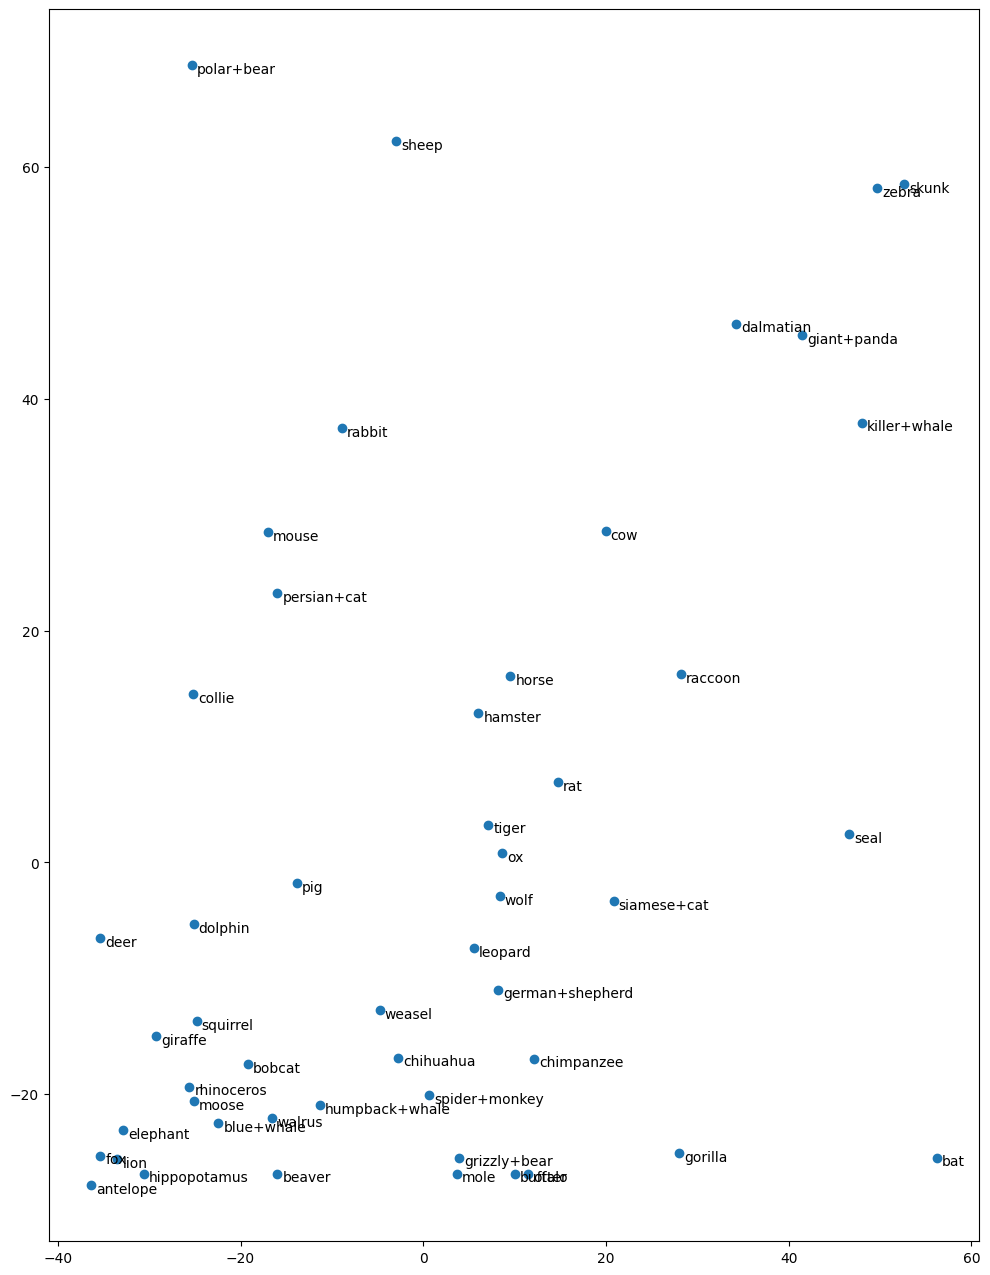

In [ ]:
# กำหนดขนาดของรูป
fig = plt.figure(figsize=(12,16))

# จงเติม argument ที่เหมาะสมในวงเล็บข้างล่างนี้
# รูปแบบของฟังก์ชันคือ plt.scatter(numpy array ของ x-coordinate, numpy array ของ y-coordinate)
#plt.scatter( #TODO: 1st column of your 50x2 matrix, #TODO: 2nd column of your 50x2 matrix )

plt.scatter(M[:, 0], M[:, 1])

# for loop เพื่อใส่คำกำกับ (annotate) ชื่อสัตว์ของแต่ละจุด วนให้ครบสัตว์ทุกชนิดที่อยู่ใน classes
# ใส่ numpy array ที่ผ่านการทำ PCA แล้วลงในตำแหน่งที่ระบุเพื่อบอกพิกัดที่ต้องวางคำกำกับ
for i in range(50):
  plt.annotate(classes[i,1],
               xy=(float(M[i, 0]), float(M[i, 1])),
               xytext=(5, -8),
               textcoords='offset pixels')


plt.show()

#### Exercise 3

หากลุ่มสัตว์ต่างๆ ที่อยู่ใกล้กันมา 4 กลุ่ม แล้วลองอธิบายว่าสัตว์ในแต่ละกลุ่มมีอะไรที่เหมือนกัน

1. กลุ่มสัตว์ที่กลาง ตัวอย่างเช่น raccon hamster rat
 มีลักษณะที่เหมือนกันคือเป็นสัตว์ฟันแทะขนาดเล็ก
2. กลุ่มสัตว์ที่มุมขวาบน ตัวอย่างเช่น moose rhinoceros blue + whare มีลักษณะที่เหมือนกันคือ เป็นสัตว์เลี้ยงลูกด้วยนมขนาดใหญ่
3. กลุ่มสัตว์ที่มุมซ้ายล่าง ตัวอย่างเช่น dalmatian ,giant + panda ,giant killer + whale มีลักษณะที่เหมือนกันคือตัวเป็นสีขาวดำ
4. กลุ่มสัตว์ที่กลางล่าง ตัวอย่างเช่น chihuahua ,chimpanzee ,spider+monkey มีลักษณะที่เหมือนกันคือ เป็นสัตว์เลี้ยงลูกด้วยนม และมีความฉลาดในระดับหนึ่ง